In [1]:
"""This is a note book to train random forest on forest prediction datatset"""

'This is a note book to train random forest on forest prediction datatset'

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r'../datasets/forest.csv')

In [4]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
data.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [ ]:
import numpy as np

# --- Collapse Wilderness Areas ---
wilderness_cols = [c for c in data.columns if c.startswith("Wilderness_Area")]
data["Wilderness_Area"] = np.argmax(data[wilderness_cols].values, axis=1) + 1
data = data.drop(columns=wilderness_cols)

# --- Collapse Soil Types ---
soil_cols = [c for c in data.columns if c.startswith("Soil_Type")]
data["Soil_Type"] = np.argmax(data[soil_cols].values, axis=1) + 1
data = data.drop(columns=soil_cols)

# Drop Id (not useful for ML)
data = data.drop(columns=["Id"])

print(data.head())
print("\nColumns:", data.columns.tolist())


   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [7]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,5,1,29
1,2590,56,2,212,-6,390,220,235,151,6225,5,1,29
2,2804,139,9,268,65,3180,234,238,135,6121,2,1,12
3,2785,155,18,242,118,3090,238,238,122,6211,2,1,30
4,2595,45,2,153,-1,391,220,234,150,6172,5,1,29


In [8]:
# Drop rows with any null values
data = data.dropna()

print(data.shape)


(15120, 13)


In [9]:

# Features and Target
X = data.drop(columns=["Cover_Type"])
y = data["Cover_Type"]

print(X.shape, y.shape)


(15120, 12) (15120,)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier(  # number of trees
    max_depth=None,   # let trees grow fully
    random_state=42,
    n_jobs=-1         # use all CPU cores
)

# Train
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8568121693121693

Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.78      0.78       432
           2       0.79      0.64      0.71       432
           3       0.83      0.81      0.82       432
           4       0.94      0.98      0.96       432
           5       0.87      0.95      0.91       432
           6       0.84      0.87      0.85       432
           7       0.94      0.97      0.95       432

    accuracy                           0.86      3024
   macro avg       0.85      0.86      0.85      3024
weighted avg       0.85      0.86      0.85      3024



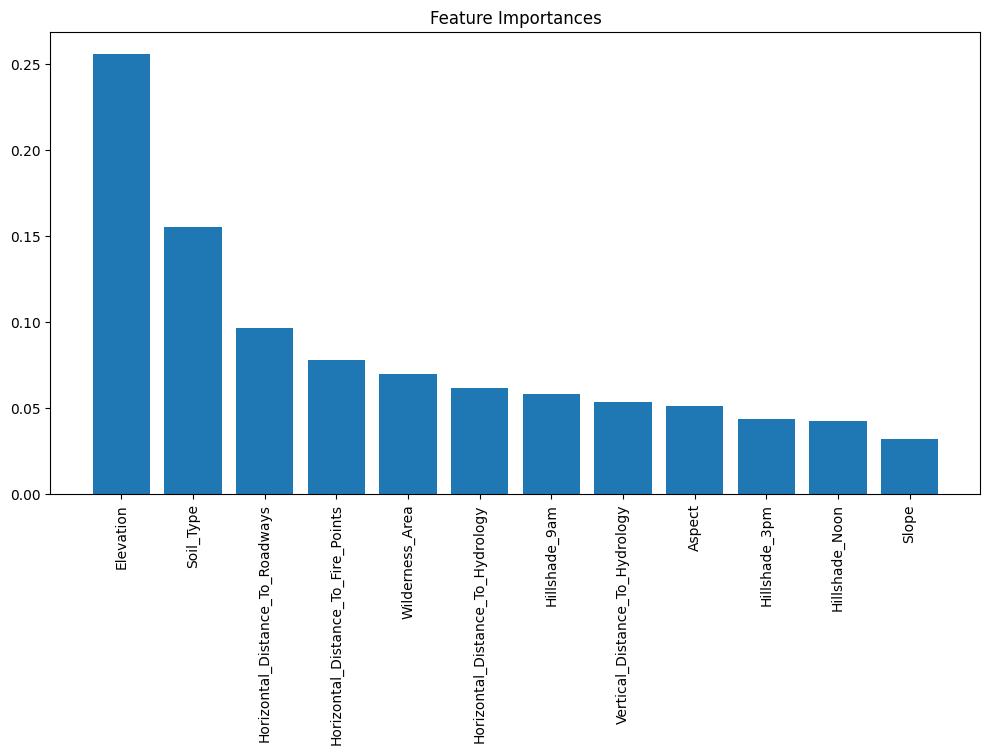

In [13]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Take top k features (max = number of features)
k = min(20, len(importances))

plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(k), importances[indices[:k]], align="center")
plt.xticks(range(k), X.columns[indices[:k]], rotation=90)
plt.show()


In [14]:
# Take first 5 rows from X_test
sample = X_test.head()

# Predict on them
predictions = rf.predict(sample)

print("Predictions:", predictions.tolist())
print("Actual:", y_test.head().tolist())


Predictions: [4, 6, 4, 5, 4]
Actual: [4, 6, 4, 5, 4]


In [15]:
import joblib

# Save trained model
joblib.dump(rf, "random_forest_model.pkl")
print("✅ Model saved as random_forest_model.pkl")

✅ Model saved as random_forest_model.pkl
